In [1]:
import matplotlib.pyplot as plt # plotting
from mpl_toolkits.basemap import Basemap # plotting maps
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3 # read the database

In [2]:
s = 0
for i in ["property damage only", "pain", "other injury", "severe injury", "fatal"]:

    with sqlite3.connect("switrs.sqlite") as con:
        query = (
                "SELECT collisions.collision_severity, collisions.weather_1,collisions.state_highway_indicator, collisions.party_count, collisions.type_of_collision,collisions.lighting, collisions.collision_time, parties.party_age,parties.party_sobriety"
                " FROM collisions INNER JOIN parties ON collisions.case_id = parties.case_id WHERE collisions.collision_severity = '%s'" %(i)
        )
    if s == 0:        
        df = pd.read_sql_query(query, con)
    else:
        df = pd.concat([df, pd.read_sql_query(query, con)], ignore_index = True)
        
    s += 1

In [3]:
df.head()

,collision_severity,weather_1,state_highway_indicator,party_count,type_of_collision,lighting,collision_time,party_age,party_sobriety
0,property damage only,cloudy,0.0,2.0,rear end,daylight,07:45:00,35.0,H
1,property damage only,cloudy,0.0,2.0,rear end,daylight,07:45:00,43.0,H
2,property damage only,clear,0.0,1.0,hit object,dark with street lights,02:50:00,NaN,G
3,property damage only,clear,1.0,2.0,sideswipe,daylight,15:15:00,NaN,G
4,property damage only,clear,1.0,2.0,sideswipe,daylight,15:15:00,71.0,A


In [25]:
df['collision_severity'].value_counts()

property damage only    10753527
pain                     4731649
other injury             2177913
severe injury             393977
fatal                     120958
Name: collision_severity, dtype: int64

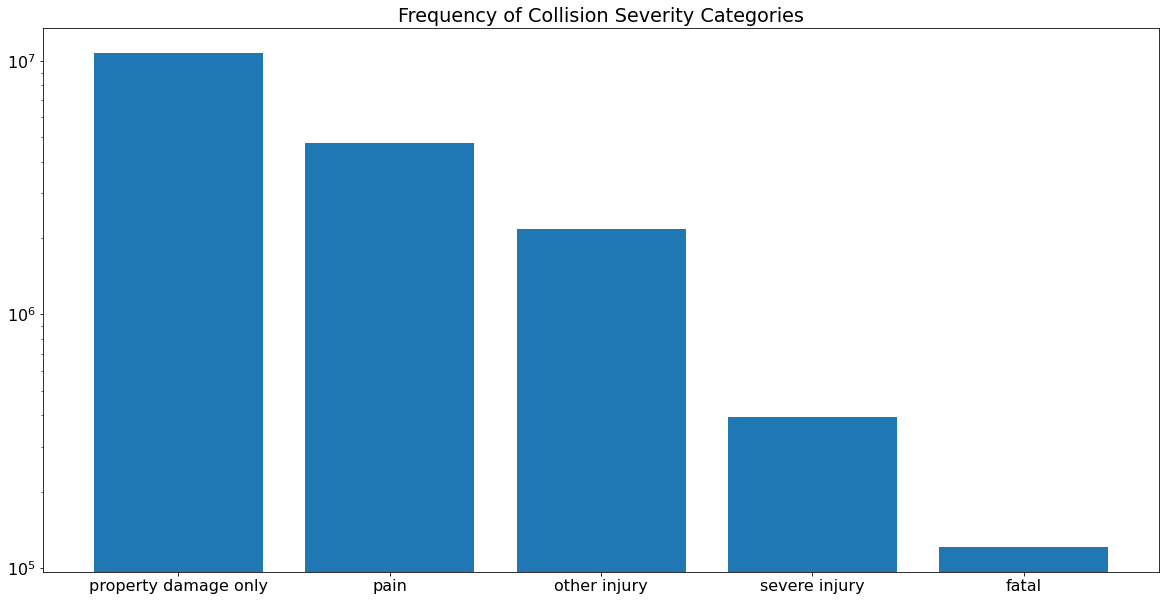

In [45]:
plt.figure(figsize=(20,10))

cs_labels = list(df['collision_severity'].value_counts().index.tolist())
cs_freqs = list(df['collision_severity'].value_counts())
plt.title('Frequency of Collision Severity Categories')

plt.bar(cs_labels, cs_freqs)
plt.yscale('log')
plt.rcParams.update({'font.size': 16})
plt.savefig('cs_label_bar.png')
plt.show()

In [5]:
import math
ages_nan = df['party_age']
ages = [x for x in ages_nan if (math.isnan(x) == False)]

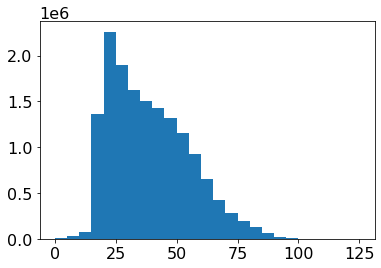

In [6]:
plt.hist(ages, bins=25)
plt.show()

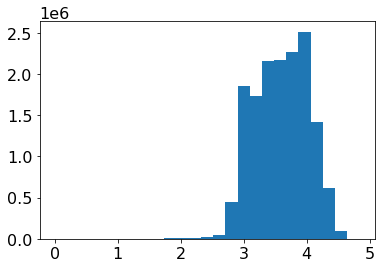

In [7]:
plt.hist(np.log(np.asarray(ages) + 1), bins=25)
plt.show()

In [8]:
df['type_of_collision']

0             rear end
1             rear end
2           hit object
3            sideswipe
4            sideswipe
               ...    
18178019       head-on
18178020       head-on
18178021    hit object
18178022    hit object
18178023    overturned
Name: type_of_collision, Length: 18178024, dtype: object

In [9]:
df.loc[df['collision_severity'] == 'fatal']

,collision_severity,weather_1,state_highway_indicator,party_count,type_of_collision,lighting,collision_time,party_age,party_sobriety
18057066,fatal,cloudy,0.0,1.0,overturned,daylight,14:25:00,54.0,A
18057067,fatal,clear,0.0,2.0,broadside,daylight,16:46:00,34.0,A
18057068,fatal,clear,0.0,2.0,broadside,daylight,16:46:00,59.0,A
18057069,fatal,clear,0.0,1.0,hit object,dark with street lights,18:20:00,34.0,A
18057070,fatal,cloudy,0.0,2.0,other,daylight,15:08:00,NaN,G
...,...,...,...,...,...,...,...,...,...
18178019,fatal,clear,0.0,2.0,head-on,dark with street lights,21:29:00,33.0,A
18178020,fatal,clear,0.0,2.0,head-on,dark with street lights,21:29:00,43.0,B
18178021,fatal,clear,0.0,2.0,hit object,dark with street lights,01:35:00,NaN,H
18178022,fatal,clear,0.0,2.0,hit object,dark with street lights,01:35:00,29.0,B


In [10]:
spec_df = df.loc[df['collision_severity'] == 'fatal']['type_of_collision']
labels = list(df['collision_severity'].unique())
freqs = list(df['collision_severity'].value_counts())

df.loc[df['collision_severity'] == 'fatal']['type_of_collision']

18057066    overturned
18057067     broadside
18057068     broadside
18057069    hit object
18057070         other
               ...    
18178019       head-on
18178020       head-on
18178021    hit object
18178022    hit object
18178023    overturned
Name: type_of_collision, Length: 120958, dtype: object

In [94]:
def freq_info(df, cs_label_type, feat, plot=True):
    spec_df = df.loc[df['collision_severity'] == cs_label_type][feat]
    labs = list(spec_df.value_counts().index.tolist())
    freqs = list(spec_df.value_counts())
    
    if (feat =='type_of_collision'):
        if (cs_label_type == 'property damage only'):
            labs.remove('O')
            labs.remove('I')
            del freqs[-1]
            del freqs[-1]  
        if (cs_label_type == 'pain'):
            labs.remove('N')
            del freqs[-1]  
    if plot:
        colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#D3A4FF', '#939393', '#FEC0F8', '#FEFEC0']
        fig, ax = plt.subplots(figsize=(10,10))
        ax.pie(freqs, labels=labs, autopct='%1.1f%%', colors=colors, pctdistance=0.85)

        #draw circle
        centre_circle = plt.Circle((0,0),0.70,fc='white')
        fig = plt.gcf()
        fig.gca().add_artist(centre_circle)

        ax.axis('equal')
        #plt.figure(figsize=(10,10))
        #plt.pie(freqs, labels=labs, autopct='%1.1f%%')
        plt.tight_layout()
        plt.show()
        
    return labs, freqs

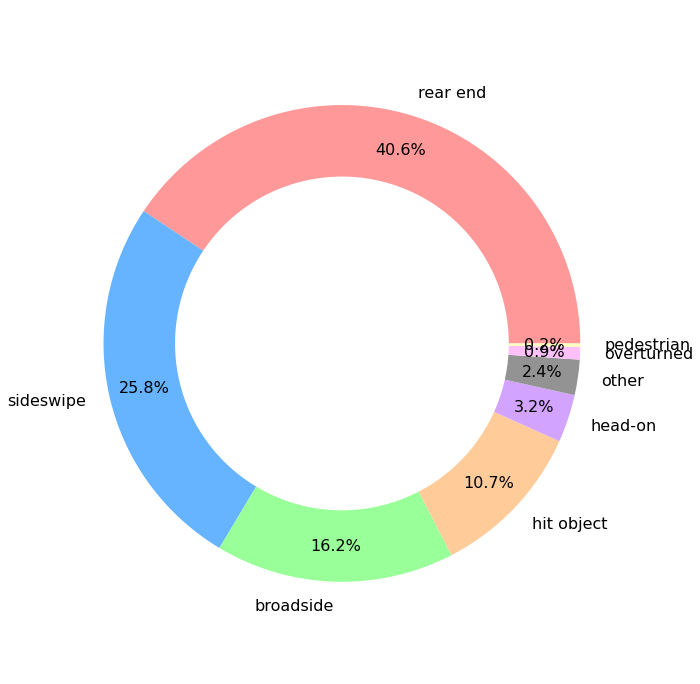

In [84]:
pie_chart(df, 'property damage only', 'type_of_collision')

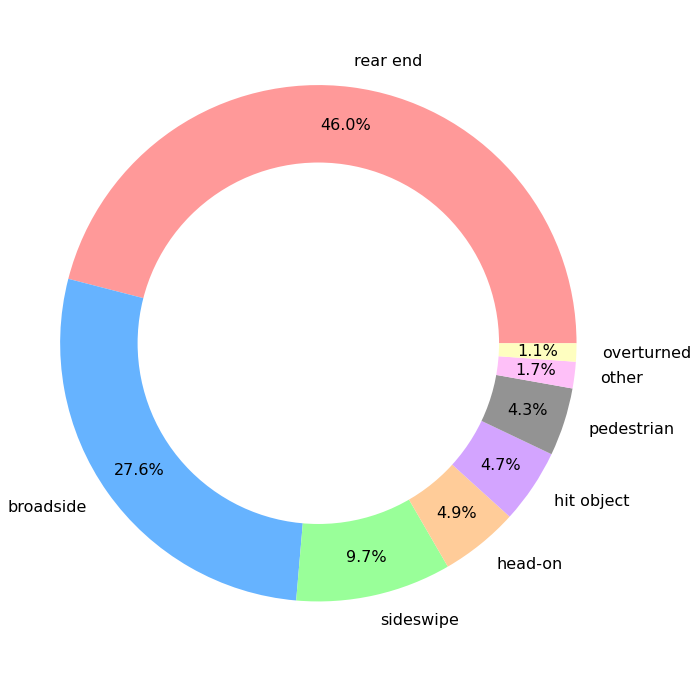

In [90]:
pie_chart(df, 'pain', 'type_of_collision')

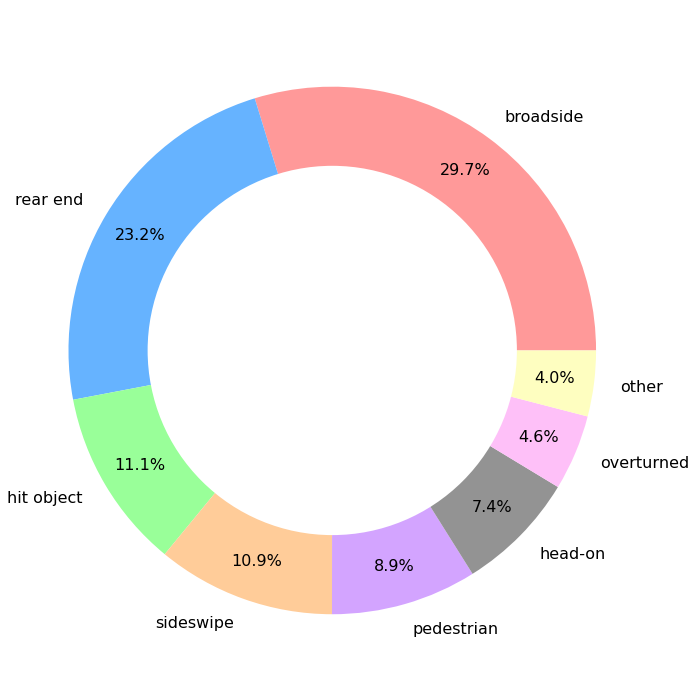

In [87]:
pie_chart(df, 'other injury', 'type_of_collision')

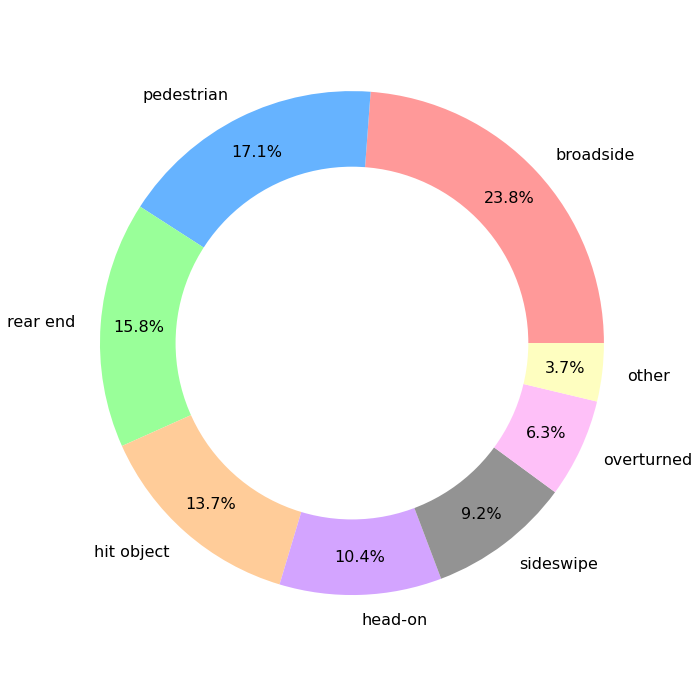

In [88]:
pie_chart(df, 'severe injury', 'type_of_collision')

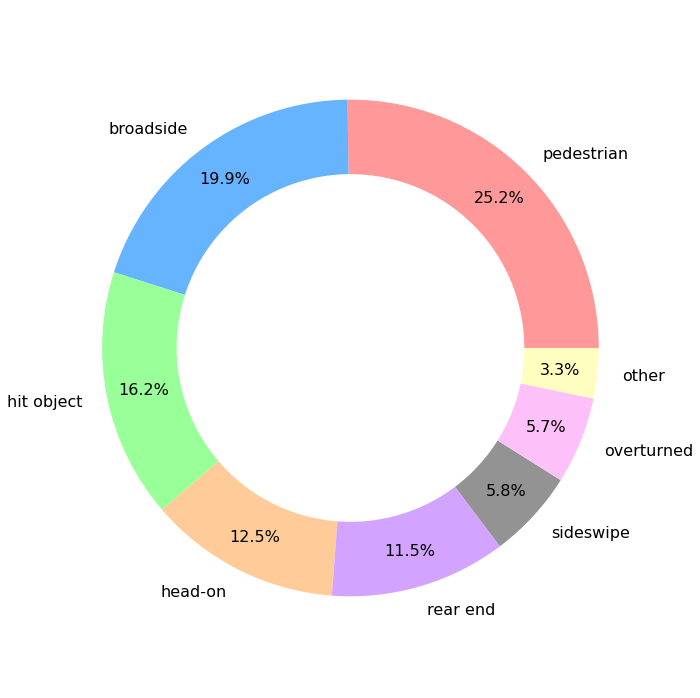

In [95]:
labs, freqs = freq_info(df, 'fatal', 'type_of_collision')